In [2]:
import numpy as np
import math
import scipy.special
import matplotlib.pyplot as plt
import scipy.integrate as integrate

---

## 1.1

### **Respuesta computacional**

In [13]:
def crear_baraja():
    '''crea una baraja donde las espadas se distinguen con 1, y el resto con 0'''
    cartas = np.array([])
    cartas = np.append(cartas,np.repeat(1,13))
    cartas = np.append(cartas,np.repeat(0,52-13))
    return cartas

$P(B|A) = P(A \cap B)/P(A)$

In [95]:
def punto1(A,B, N=100000):
    '''Primeras A cartas espadas, siguientes B cartas espadas'''
    A_ocurrio = 0
    A_B_ocurrio = 0

    for i in range(N):
        cartas = crear_baraja()
        np.random.shuffle(cartas)
        
        if (sum(cartas[0:A]) ==A):
            A_ocurrio +=1

        if ((sum(cartas[0:A]) ==A ) & (sum(cartas[A:5])==B)):
            A_B_ocurrio +=1
    
    return A_B_ocurrio/A_ocurrio
    

### a)

In [97]:
#Primeras 2 cartas espadas, siguientes 3 cartas espadas
punto1(2,3)

0.008330440819160014

### b)

In [98]:
#Primeras 3 cartas espadas, siguientes 2 cartas espadas
punto1(3,2)

0.039596273291925464

### c)

In [114]:
#Primeras 4 cartas espadas, siguientes 1 cartas espadas
punto1(4,1)

0.18867924528301888

---

## 1.2

### **Respuesta teorica**

Calculamos P(X=0) = probabilidad de que ninguno se enferme  = probabilidad de que **inoculado** no se enferme (evento A) **y** que **no inoculado** no se enferme (evento B) = $P(A\cap B) = P(A)*P(B)$ (porque se asume independencia).

P(A)= 0.6x0.8+0.4, P(B) = 0.6x0.1+0.4

In [160]:
(0.6*0.8+0.4)*(0.6*0.1+0.4)

0.4048

Entonces probabilidad que al menos una de ellas se enferme:

In [161]:
#Respuesta
1-(0.6*0.8+0.4)*(0.6*0.1+0.4)

0.5952

### **Respuesta computacional**

In [36]:
N = 10000000

#Distribucion de exposicion al virus. Exito = no contraer
no_exposicion = np.random.binomial(1,0.4,size=N)
#Distribucion de inoculados segun contraen o no gripa. Exito = no contraer
prev_inoculada = np.random.binomial(1,0.8,size=N)
#Distribution de no inoculados segun contraen o no gripa. Exito = no contraer
prev_noinoculada = np.random.binomial(1,0.1,size=N)

In [37]:
#probabilidad de no exposicion al virus
p_noexp = sum(no_exposicion)/N
#probabilidad de exposicion al virus
p_exp = 1- p_noexp

#probabilidad de no contraer para los inoculados
p_inoc = sum(prev_inoculada)/N
#probabilidad de no contraer para los no inoculados
p_noinoc = sum(prev_noinoculada)/N

Probabilidad de que al menos una de ellas se enferme:

In [39]:
result = 1-(p_exp*p_inoc+p_noexp)*(p_exp*p_noinoc+p_noexp)
np.round(result,5)

0.59489

----

## 2.1

In [184]:
##Muestreo 1
N1 = 5 
a1 = 1 #bueno
##Muestreo 2
N2 = 25  
a2 = 5 #bueno

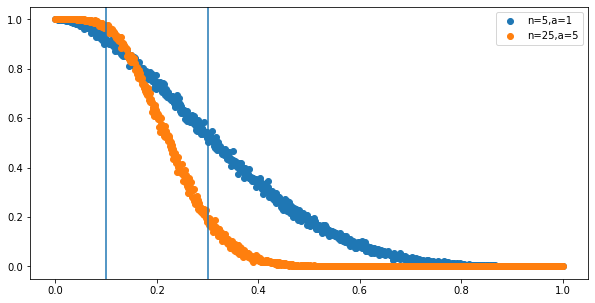

In [185]:
#p:= piezas defectuosas
N = 1000

probs = np.linspace(0,1,N)
fig,ax = plt.subplots(figsize=(10,5))

y1 = []
for p in probs:
    obs = np.random.binomial(N1,p,N)
    exitos = np.where(obs<=a1)
    probexito =(exitos[0].shape[0])/N
    y1.append(probexito)

ax.scatter(probs,y1,label=f'n={N1},a={a1}')


y2 = []
for p in probs:
    obs = np.random.binomial(N2,p,N)
    exitos = np.where(obs<=a2)
    probexito =(exitos[0].shape[0])/N
    y2.append(probexito)

ax.scatter(probs,y2,label=f'n={N2},a={a2}')

ax.axvline(x=0.1)
ax.axvline(x=0.3)
ax.legend()

a) Si fuera el vendedor produciendo con $p\in[0,0.10]$ optaria por el plan de muestreo (n=25,a=5), porque en promedio, la probabilidad de aceptacion es mayor en comparacion al otro plan.

b)Si fuera un comprador que quisiera protegerse contra la aceptación de lotes con un $p\in[0.3,1]$, escogería el plan (n=25,a=5), pues en promedio, la probabilidad de aceptación es menor que la del otro plan

## 2.2

### **a)**

In [26]:
N =int(1e6)
poisson_events = np.random.poisson(1,N)
support = set(poisson_events) 

In [27]:
for s in support:
    event = poisson_events[np.where(poisson_events>=s)]
    p = len(event)/N
    if p<0.01:
        print("Respuesta:")
        print(f"El menor valor de n es {s}.\
         \nCon probabilidad {p}, hay al menos {s} desconexiones en menos de un periodo de 4 horas")
        break

Respuesta:
El menor valor de n es 5.         
Con probabilidad 0.003615, hay al menos 5 desconexiones en menos de un periodo de 4 horas


### **b)**

In [35]:
for i in range(0,100):
    poisson_events = np.random.poisson(i/4,N)
    event = poisson_events[np.where(poisson_events==0)]
    p = len(event)/N
    print(f"h={i} -> P(Y=0)={p}")
    if p<0.02:
        print("\nRespuesta:")
        print(f"El menor valor de h es {i}.\
         \nCon probabilidad {p}, hay 0 desconexiones en un periodo de {i} horas")
        break

h=0 -> P(Y=0)=1.0
h=1 -> P(Y=0)=0.7787232
h=2 -> P(Y=0)=0.606408
h=3 -> P(Y=0)=0.4725847
h=4 -> P(Y=0)=0.3677614
h=5 -> P(Y=0)=0.2865534
h=6 -> P(Y=0)=0.2231458
h=7 -> P(Y=0)=0.1740034
h=8 -> P(Y=0)=0.1352531
h=9 -> P(Y=0)=0.1052287
h=10 -> P(Y=0)=0.0822473
h=11 -> P(Y=0)=0.0639479
h=12 -> P(Y=0)=0.0496368
h=13 -> P(Y=0)=0.0388693
h=14 -> P(Y=0)=0.03025
h=15 -> P(Y=0)=0.0234768
h=16 -> P(Y=0)=0.0182888

Respuesta:
El menor valor de h es 16.         
Con probabilidad 0.0182888, hay 0 desconexiones en un periodo de 16 horas


### **c)**

In [28]:
N =int(1e7)
first_poi = np.random.poisson(1,N)
second_poi = np.random.poisson(1,N)
third_poi = np.random.poisson(1,N)

events = []
for i in range(N):
    events.append((first_poi[i], second_poi[i], third_poi[i]))

In [29]:
counter = 0
for e in events:
    if e.count(0) == 1:
        counter+=1
p = counter/N

**Respuesta**

In [30]:
print(f"La probabilidad de que en 3 periodos consecutivos de 4h, haya un solo periodo de 4h SIN desconexiones es aprox\
\n{p}")

La probabilidad de que en 3 periodos consecutivos de 4h, haya un solo periodo de 4h SIN desconexiones es aprox
0.4408637


### **d)**

In [31]:
counter = 0
for e in events:
    if sum(e) == 3*1:
        counter+=1
p=counter/N

In [32]:
print(f"La probabilidad de que el numero de desconexiones en 3 periodos consecutivos de 4h sea igual al numero esperado\
\nde desconexiones en 3 periodos consecutivos de 4 horas es: \
\n{p}")

La probabilidad de que el numero de desconexiones en 3 periodos consecutivos de 4h sea igual al numero esperado
de desconexiones en 3 periodos consecutivos de 4 horas es: 
0.2239148


---

## 3.1

In [3]:
def f(x):
    if x>=-1 and x<=2:
        return (x**2)/3
    else:
        return 0

Es una funcion de densidad porque la integral en todo el soporte es igual a 1

In [4]:
np.round(integrate.quad(f, -1, 2)[0],4)

1.0

In [5]:
print(f"P(0<X<=1) = {integrate.quad(f, 0, 1)[0]}")

P(0<X<=1) = 0.11111111111111112


In [6]:
print(f"P(1<X<=2) = {integrate.quad(f, 1, 2)[0]}")

P(1<X<=2) = 0.7777777777777778


## 3.2

### **a)**

In [25]:
N = 100000
sample = np.random.normal(78,6,size = N)

In [14]:
A = np.where((sample>=72))[0] #Evento de alcanzar calificaciones mayores a 72
len(A)/N

0.8375

### **b)**

In [72]:
#Respuesta teorica aprox
1.28*6+78

85.68

In [50]:
#Mi Respuesta
sorted_sample = sample.copy()
#organizo la muestra
sorted_sample.sort()

#Percentil 90
p90 = sorted_sample[int(N*0.9)]

print(f"La calificion minima que un estudiante debe recibir para ganar una calificacion de A es aprox: \n{np.round(p90,2)}")

La calificion minima que un estudiante debe recibir para ganar una calificacion de A es aprox: 
85.73


### **c)** 

In [71]:
#Respuesta teorica: 81.48
0.58*6+78

81.48

In [51]:
cutoff = 1-0.281

In [56]:
print(f"El punto limite para pasar al 28.1% mas alto de las calificaciones es \n\
{np.round(sorted_sample[int(N*cutoff)],2)}")

El punto limite para pasar al 28.1% mas alto de las calificaciones es 
81.53


### **d)**

In [69]:
p25 = sorted_sample[int(N*0.25)]
cutoff = p25+5

result = len(sorted_sample[np.where(sorted_sample>=cutoff)])/N

print(f"La proporcion de estudiantes que tienen calificaciones de 5 \n\
o más puntos arriba del percentil 25 es aprox: \n{result}")

La proporcion de estudiantes que tienen calificaciones de 5 
o más puntos arriba del percentil 25 es aprox: 
0.43472


### **e)**

In [75]:
conditional_sample = sorted_sample[np.where(sorted_sample>72)].copy()

In [82]:
#
exceeds = len(conditional_sample[np.where(conditional_sample>84)])
total = len(conditional_sample)
p = exceeds/total
print(f"La probabilidad de que la calificacion exceda 84 dado que excede 72 es aprox: \n{np.round(p,2)}")

La probabilidad de que la calificacion exceda 84 dado que excede 72 es aprox: 
0.19


----

## 4.1

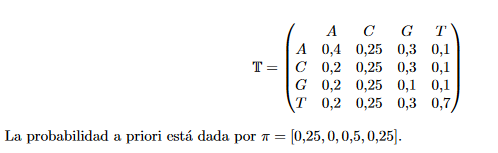

In [216]:
M =np.array([
    [.4,.25,.3,.1],
    [.2,.25,.3,.1],
    [.2,.25,.1,.1],
    [.2,.25,.3,.7]
    
])

priori = np.array([.25,0.,.5,.25])

probabilidad del gen [T,G,C,T,C,A,A,A]

In [217]:
print(f"priori T: {priori[-1]},T->G {M[2,3]},G->C {M[1,2]},C->T {M[3,1]},T->C {M[1,3]},\n \
      C->A {M[0,1]},A->A {M[0,0]},A->A {M[0,0]}")

priori T: 0.25,T->G 0.1,G->C 0.3,C->T 0.25,T->C 0.1,
       C->A 0.25,A->A 0.4,A->A 0.4


In [220]:
a = priori[-1]*M[2,3]*M[1,2]*M[3,1]*M[1,3]*M[0,1]*M[0,0]*M[0,0]
a

7.500000000000001e-06

## 4.2

In [221]:
E = np.array([
    [.8,0.,0.,.2],
    [.05,.9,.1,.1],
    [.05,.1,.9,0.],
    [.1,.0,.0,.7]
])

P(A|T)*P(C|G)*P(G|C)*P(A|T)*P(G|C)*P(U|A)*P(U|A)*P(U|A)

In [225]:
b = E[3,3]*E[2,2]*E[1,1]*E[3,3]*E[1,1]*E[0,0]*E[0,0]*E[0,0]

In [226]:
b*a

1.3716864000000004e-06